破产公司预测

In [64]:
import pandas as pd
import os 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import lightgbm as lgb
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [65]:
data_dir="C:\\Users\\YuNHz\\Desktop"
fname=os.path.join(data_dir,"破产公司数据建模.csv")
f=open(fname,encoding="utf-8")
df = pd.read_csv(f)
f.close()
print(type(df))
pd.set_option('display.max_columns', None)
df = df.dropna()
df.head()

<class 'pandas.core.frame.DataFrame'>


,Current Ratio,Debt ratio,Interest Coverage Ratio,Total Asset Turnover,Inventory Turnover Rate,Net Income to Total Assets,Net Income to Stockholder's Equity,Bankrupt?
0,0.001208,0.207576,0.564050,0.086957,0.000182,0.716845,0.827890,0
1,0.004039,0.171176,0.570175,0.064468,0.000182,0.795297,0.839969,0
2,0.005348,0.207516,0.563706,0.014993,0.000182,0.774670,0.836774,0
3,0.002896,0.151465,0.564663,0.089955,0.000182,0.739555,0.834697,1
4,0.003727,0.106509,0.575617,0.175412,0.000163,0.795016,0.839973,0


数据分割

In [66]:
df1 = df[["Current Ratio","Debt ratio","Interest Coverage Ratio","Total Asset Turnover","Inventory Turnover Rate","Net Income to Total Assets","Net Income to Stockholder's Equity","Bankrupt?"]]
X = df1.drop(columns = "Bankrupt?")
Y = df1["Bankrupt?"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [67]:
from collections import Counter
print("Y_test:",Counter(Y_test))
print("Y_train:",Counter(Y_train))
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , Y_train.shape)
print('y_test shape is ' , Y_test.shape)

Y_test: Counter({0: 1650, 1: 55})
Y_train: Counter({0: 4949, 1: 165})
X_train shape is  (5114, 7)
X_test shape is  (1705, 7)
y_train shape is  (5114,)
y_test shape is  (1705,)


数据归约

In [68]:
X_train,Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)

数据转换（Z-score标准化处理）

In [69]:
X_train = stats.zscore(X_train)
X_test = stats.zscore(X_test)

In [70]:

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , Y_train.shape)
print('y_test shape is ' , Y_test.shape)

X_train shape is  (9898, 7)
X_test shape is  (1705, 7)
y_train shape is  (9898,)
y_test shape is  (1705,)


In [71]:
from collections import Counter
print("Y_test:",Counter(Y_test))
print("Y_train:",Counter(Y_train))

Y_test: Counter({0: 1650, 1: 55})
Y_train: Counter({0: 4949, 1: 4949})


逻辑回归模型

[1 0 1 ... 1 0 0]

__________________________LogisticRegression__________________________

Accuracy score: 35.95307917888563
Train set Accuracy:  58.47645989088704
Test set Accuracy:  35.95307917888563
              precision    recall  f1-score   support

           0       0.97      0.35      0.51      1650
           1       0.04      0.73      0.07        55

    accuracy                           0.36      1705
   macro avg       0.51      0.54      0.29      1705
weighted avg       0.94      0.36      0.50      1705

LogisticRegression: 35.95308%
[[ 573 1077]
 [  15   40]]


<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

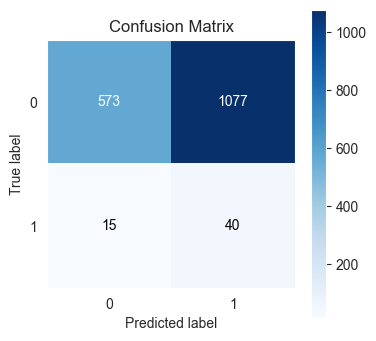

In [72]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print(pred)
print("""
__________________________"""+"LogisticRegression"+"""__________________________
""")
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(Y_test, pred)
print(f"Accuracy score: {acc1*100}")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train))*100)
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred)*100)
arg_test = {'y_true':Y_test, 'y_pred':pred}
print(classification_report(**arg_test))
print("LogisticRegression"+ ': {:.5f}%'.format(acc1 * 100))
cm = confusion_matrix(Y_test, pred)
print(cm)

skplt.metrics.plot_confusion_matrix(Y_test, pred,figsize=(4,4))

支持向量机模型


__________________________SVC__________________________

SVC Accuracy: 81.52493%
Train set Accuracy:  85.2899575671853
Test set Accuracy:  81.52492668621701
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1650
           1       0.04      0.20      0.07        55

    accuracy                           0.82      1705
   macro avg       0.50      0.52      0.48      1705
weighted avg       0.94      0.82      0.87      1705

[[1379  271]
 [  44   11]]


<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

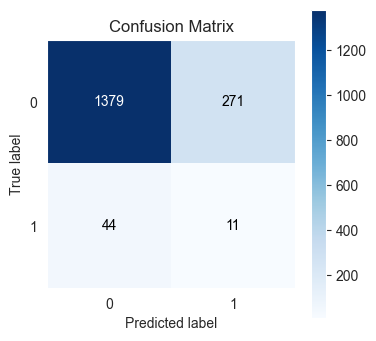

In [73]:
#SVC
from sklearn.svm import SVC
model = SVC(C=100000.0,kernel = 'rbf', random_state = 0)
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print("""
__________________________"""+"SVC"+"""__________________________
""")
acc2 = accuracy_score(Y_test, pred)
print("SVC Accuracy"+ ': {:.5f}%'.format(acc2 * 100))
arg_test = {'y_true':Y_test, 'y_pred':pred}

print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train))*100)
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred)*100)
print(classification_report(**arg_test))
cm = confusion_matrix(Y_test, pred)
print(cm)
skplt.metrics.plot_confusion_matrix(Y_test, pred,figsize=(4,4))

KNN模型


  __________________________K-Nearest Neighbors__________________________
  
K-Nearest Neighbors: 85.86510%
Train set Accuracy:  98.94928268337037
Test set Accuracy:  85.86510263929618
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1650
           1       0.03      0.11      0.05        55

    accuracy                           0.86      1705
   macro avg       0.50      0.50      0.49      1705
weighted avg       0.94      0.86      0.90      1705



<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

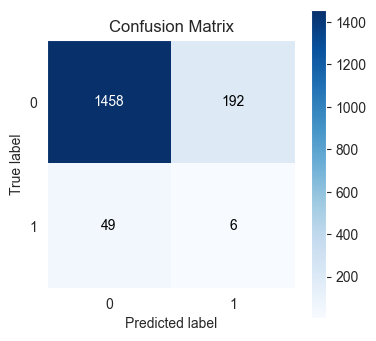

In [83]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("""
  __________________________"""+"K-Nearest Neighbors"+"""__________________________
  """)
  
acc3 = accuracy_score(Y_test, pred)
print("K-Nearest Neighbors"+ ': {:.5f}%'.format(acc3 * 100))
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train))*100)
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred)*100)

arg_test = {'y_true':Y_test, 'y_pred':pred}
print(classification_report(**arg_test))
skplt.metrics.plot_confusion_matrix(Y_test, pred,figsize=(4,4))

决策树模型


  __________________________Decison Tree__________________________
  
Decisoin Tree: 87.27273%
Train set Accuracy:  95.15053546170944
Test set Accuracy:  87.27272727272727
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1650
           1       0.04      0.13      0.06        55

    accuracy                           0.87      1705
   macro avg       0.50      0.51      0.50      1705
weighted avg       0.94      0.87      0.90      1705



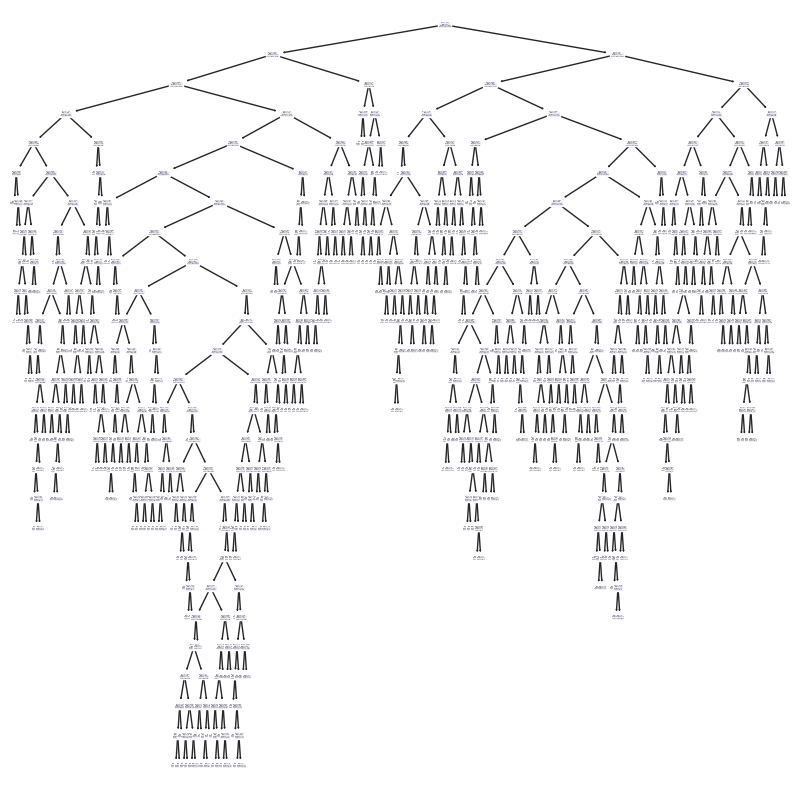

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

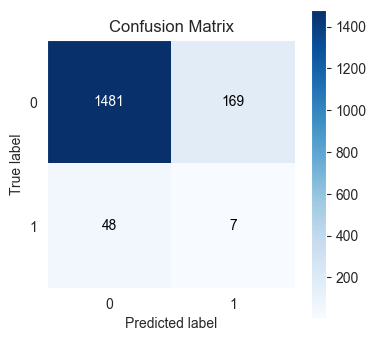

In [81]:
model = tree.DecisionTreeClassifier(max_depth=25,max_leaf_nodes=440,random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("""
  __________________________"""+"Decison Tree"+"""__________________________
  """)
  
acc4 = accuracy_score(Y_test, pred)
print("Decisoin Tree"+ ': {:.5f}%'.format(acc4 * 100))
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train))*100)
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred)*100)



arg_test = {'y_true':Y_test, 'y_pred':pred}
print(classification_report(**arg_test))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(model)
plt.show()
skplt.metrics.plot_confusion_matrix(Y_test, pred,figsize=(4,4))

<AxesSubplot: >

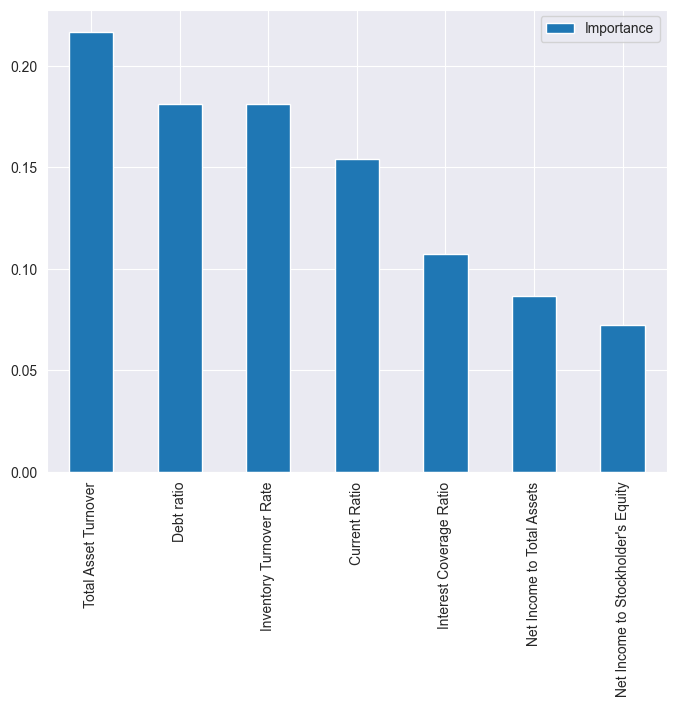

In [76]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

随机森林模型


  __________________________Random Forest__________________________
  
Random Forest: 95.19062%
Train set Accuracy:  100.0
Test set Accuracy:  95.19061583577712
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1650
           1       0.03      0.02      0.02        55

    accuracy                           0.95      1705
   macro avg       0.50      0.50      0.50      1705
weighted avg       0.94      0.95      0.94      1705



<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

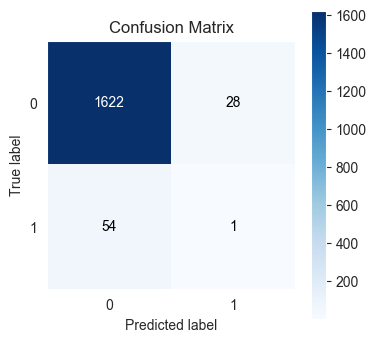

In [84]:
model = ensemble.RandomForestClassifier(n_estimators=110,criterion="gini",oob_score=True,random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("""
  __________________________"""+"Random Forest"+"""__________________________
  """)
  
acc5 = accuracy_score(Y_test, pred)
print("Random Forest"+ ': {:.5f}%'.format(acc5 * 100))
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train))*100)
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred)*100)


arg_test = {'y_true':Y_test, 'y_pred':pred}
print(classification_report(**arg_test))
skplt.metrics.plot_confusion_matrix(Y_test, pred,figsize=(4,4))

<AxesSubplot: >

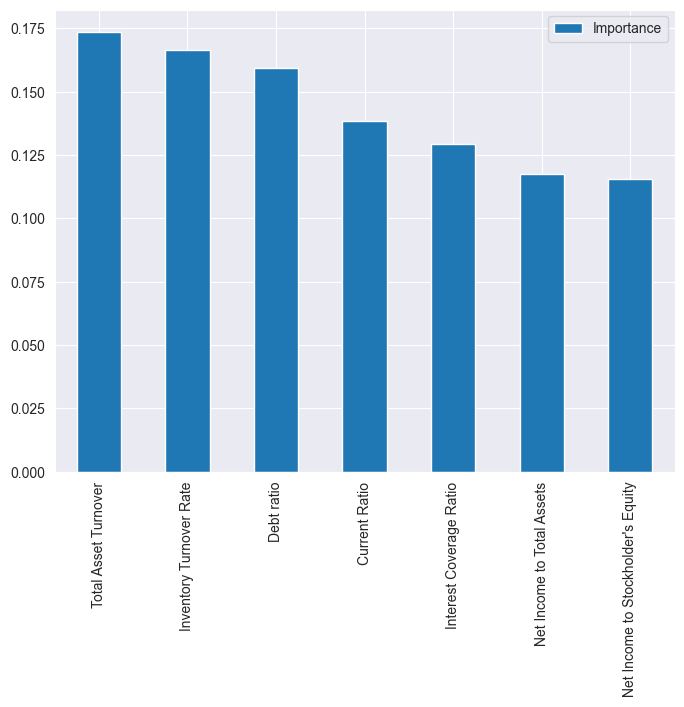

In [78]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

模型汇总比较

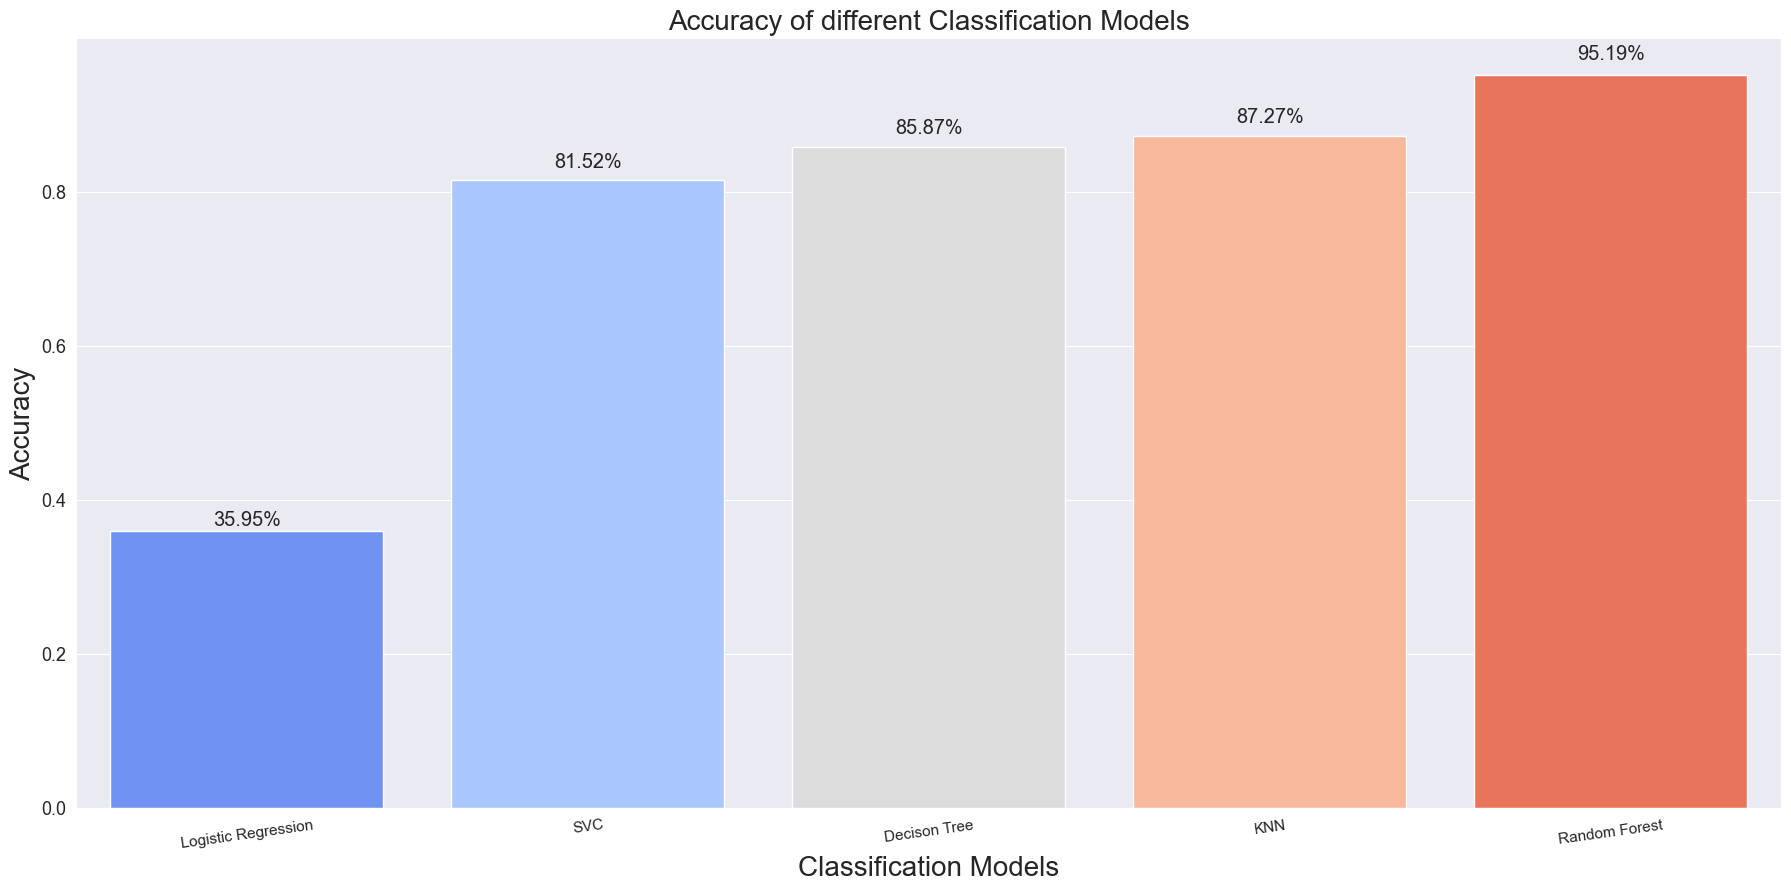

In [79]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVC")
mylist.append(acc3)
mylist2.append("Decison Tree")
mylist.append(acc4)
mylist2.append("KNN")
mylist.append(acc5)
mylist2.append("Random Forest")

plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)

plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [85]:
original_models={
    "Logistic Regression":LogisticRegression(random_state = 0),
    "SVC":SVC(C=100000.0,kernel = 'rbf', random_state = 0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
    "Decision Tree":tree.DecisionTreeClassifier(max_depth=25,max_leaf_nodes=440,random_state=1),
    "Random Forest":ensemble.RandomForestClassifier(n_estimators=110,criterion="gini",oob_score=True,random_state=1)
    }
for name, model in original_models.items():
  model.fit(X_train, Y_train)

各个模型的具体效能报告（汇总）

In [87]:
original_results = []

for name, model in original_models.items():
  result = model.score(X_test, Y_test)
  original_results.append(result)

  print("""
  __________________________"""+name+"""__________________________
  """)

  model = original_models[name]
  y_test_pred = model.predict(X_test)
  arg_test = {'y_true':Y_test, 'y_pred':y_test_pred}
  print(confusion_matrix(**arg_test))
  print(classification_report(**arg_test))

  print(name + ': {:.5f}%'.format(result * 100))


  __________________________Logistic Regression__________________________
  
[[ 573 1077]
 [  15   40]]
              precision    recall  f1-score   support

           0       0.97      0.35      0.51      1650
           1       0.04      0.73      0.07        55

    accuracy                           0.36      1705
   macro avg       0.51      0.54      0.29      1705
weighted avg       0.94      0.36      0.50      1705

Logistic Regression: 35.95308%

  __________________________SVC__________________________
  
[[1379  271]
 [  44   11]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1650
           1       0.04      0.20      0.07        55

    accuracy                           0.82      1705
   macro avg       0.50      0.52      0.48      1705
weighted avg       0.94      0.82      0.87      1705

SVC: 81.52493%

  __________________________K-Nearest Neighbors__________________________
  
[[1458  192]
 [  49    6]]
 

各个模型混淆矩阵（汇总）

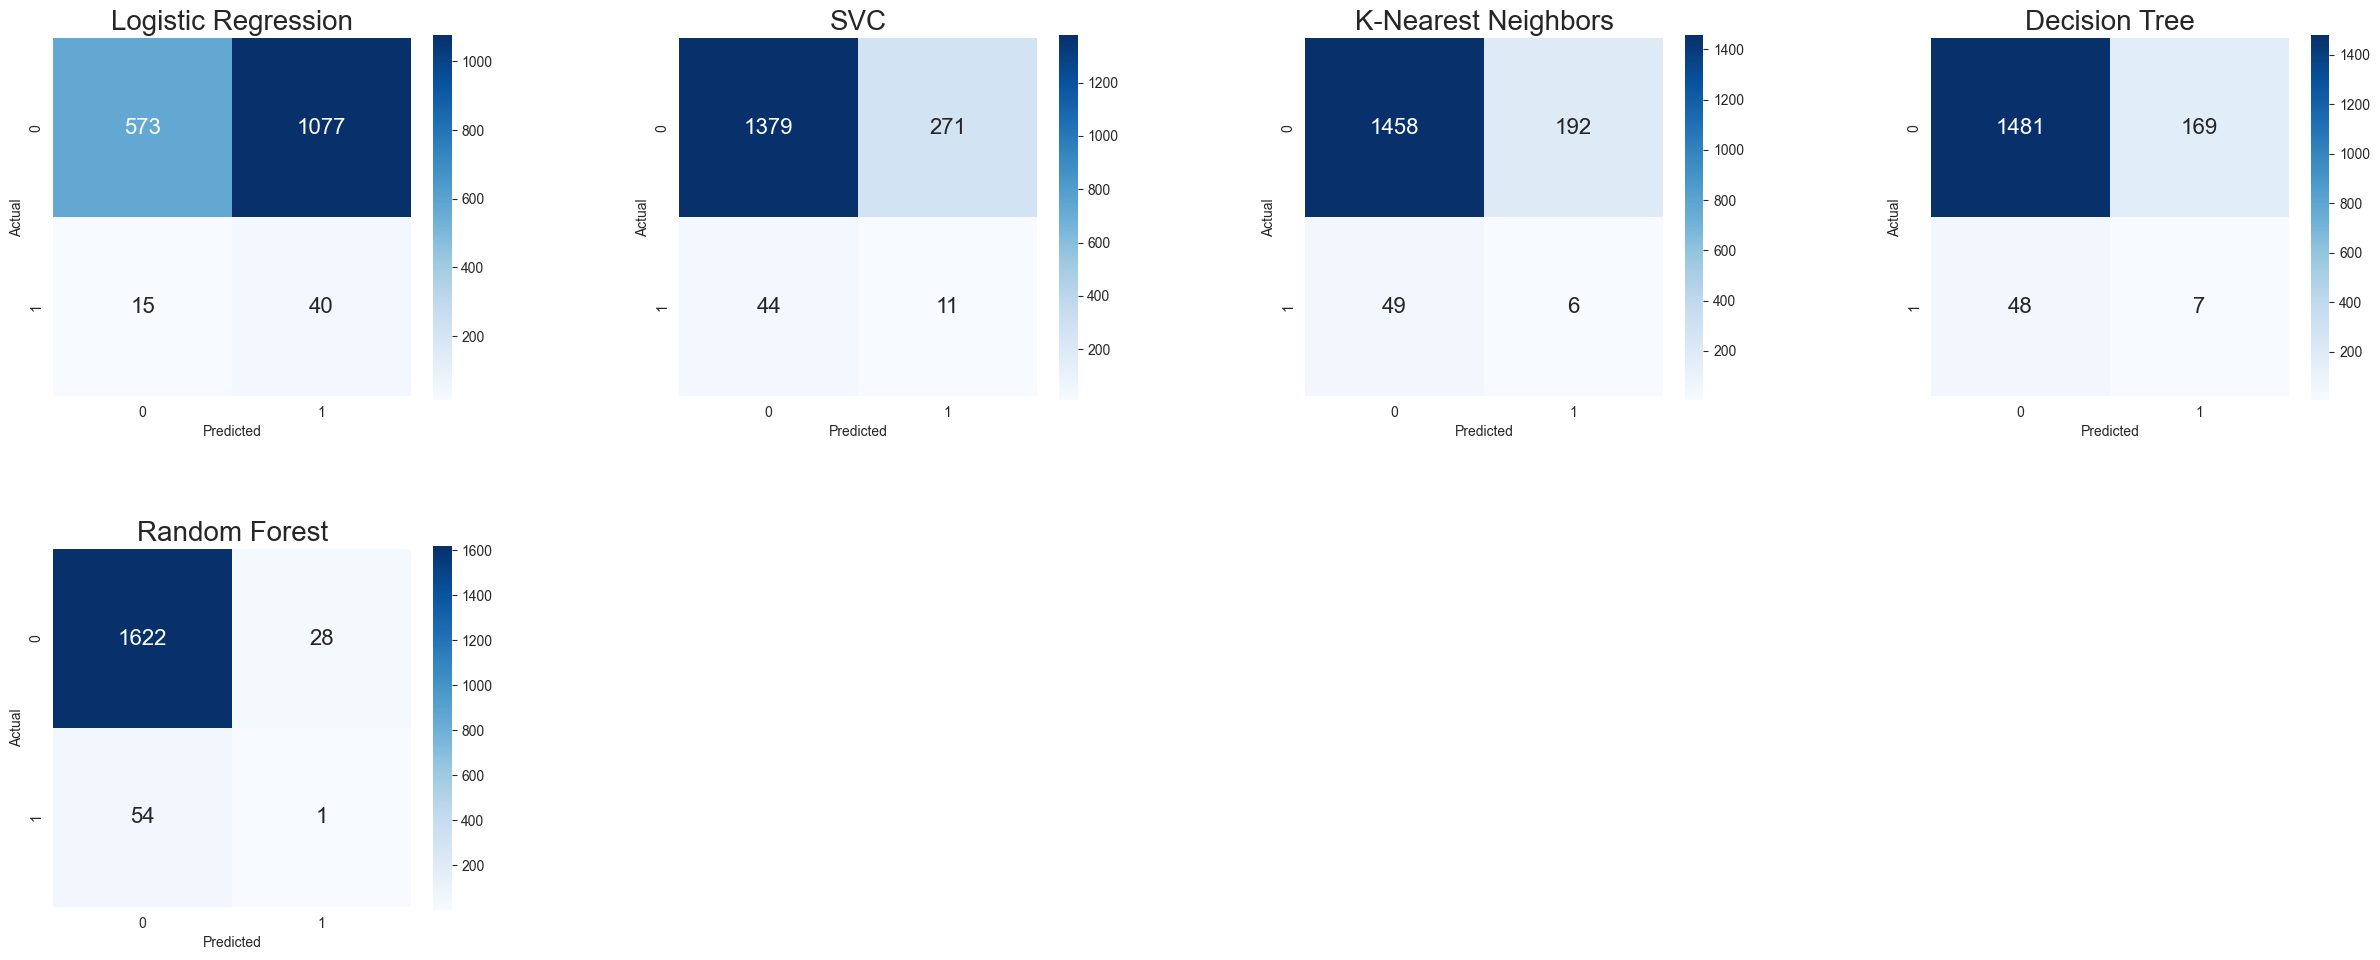

In [86]:
a = 3  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30, 18))

for name, model in original_models.items():
    original_results_smote = model.score(X_test, Y_test)
    model = original_models[name]
    y_test_pred_smote = model.predict(X_test)
    arg_test = {'y_true':Y_test, 'y_pred':y_test_pred_smote}

    conf_mx0 = confusion_matrix(Y_test, y_test_pred_smote)

    heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(Y_test), index = np.unique(Y_test))
    heat_cm0.index.name = 'Actual'
    heat_cm0.columns.name = 'Predicted'

    plt.subplot(a, b, c)
    #plt.title(name)
    fig.subplots_adjust(left=None, bottom=None, right= None, top=None, wspace=0.4, hspace= 0.4)
    sns.heatmap(heat_cm0, annot=True, fmt='.0f', square=True, annot_kws={"size": 16}, cmap = 'Blues').set_title(name, fontsize = 20)
    c = c + 1

plt.show()